In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

# Loading Datasets

In [3]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Checking if there is any null data

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Plotting and Visualization

<AxesSubplot:xlabel='age', ylabel='chol'>

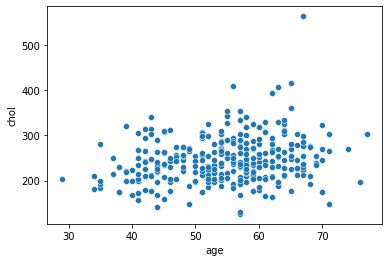

In [5]:
sns.scatterplot(x='age',y='chol',data=df)

<AxesSubplot:xlabel='cp', ylabel='age'>

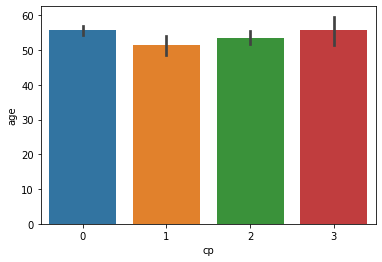

In [6]:
sns.barplot(x='cp',y='age',data=df)

<AxesSubplot:xlabel='output', ylabel='cp'>

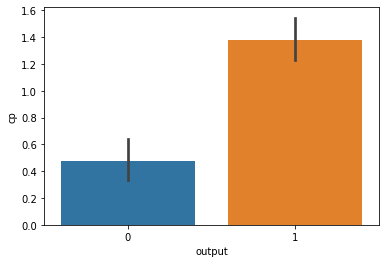

In [7]:
 sns.barplot(x='output',y='cp',data=df)

# Visualization

chest main mostly effect to cause heartattack
because lower the chest pain  the probablity of hea

<AxesSubplot:xlabel='output', ylabel='chol'>

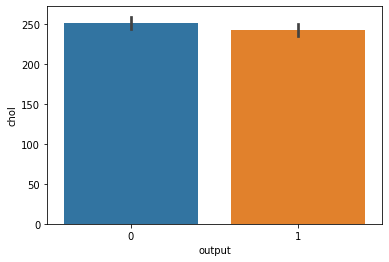

In [8]:
 sns.barplot(x='output',y='chol',data=df)

<AxesSubplot:xlabel='output', ylabel='age'>

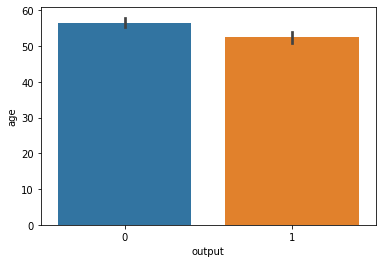

In [9]:
 sns.barplot(x='output',y='age',data=df)

In [10]:
x=df.drop(['output'],axis=1)
y=df['output']

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
sc=StandardScaler()

In [13]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

# Logistic Regression

In [14]:
lr=LogisticRegression()

In [15]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [16]:
lr.score(xtest,ytest)

0.8852459016393442

In [17]:
yp=lr.predict(xtest)

<AxesSubplot:>

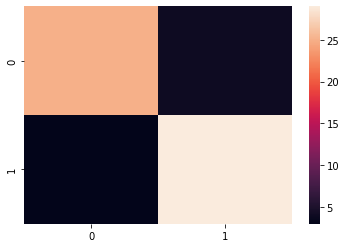

In [18]:
cn=confusion_matrix(ytest,yp)
sns.heatmap(cn)

In [19]:
cn

array([[25,  4],
       [ 3, 29]])

# USING SVC

In [20]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [21]:
sv.score(xtest,ytest)

0.8688524590163934

# Random Forest Classifier

In [22]:
rfc=RandomForestClassifier(n_estimators=200)

In [23]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [24]:
rfc.score(xtest,ytest)

0.8524590163934426

# Cross validation 

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
rfm=cross_val_score(rfc,X=xtrain,y=ytrain,cv=10)
rfm.mean()

0.8223333333333335

# K-Nearest Neighbour

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knc=KNeighborsClassifier(n_neighbors=5)

In [29]:
knc.fit(xtrain,ytrain)

KNeighborsClassifier()

In [30]:
knc.score(xtest,ytest)

0.9016393442622951

In [31]:
df.head(7)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


# Predicting the values

In [32]:
a=[[52,0,2,140,230,1,0,160,1,2.7,0,0,1]]
knc.predict(a)

array([1])

results show that in this case there is a high chance of getting heartattack

# Saving Model

In [33]:
import pickle
model='knc.sav'
pickle.dump(knc,open(model,'wb'))